In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Uploading data set into python env to read and analyze
from google.colab import files
uploaded = files.upload()

Saving Titanic_test.csv to Titanic_test (1).csv
Saving Titanic_train.csv to Titanic_train (1).csv


In [3]:
#Loading train and test sets
train_df =pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Loading Data Sets**

In [4]:
#General info of the train set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Overview Of Train Set**

- There are 891 entries in the train set since it the train set probable assumption is that it has 80% or 70% of the actual entries of original data set.
- Train set has 12 columns and thier data types, int and object types are 5 each and 2 of them are float.
- Some of the variables has missing values like age,cabin and emabarked we can handle them in preprocessing stage

**<u>About Features</u>**

1. PassengerId :- Unique identification of the passengers.

2. Survived :- whether the individual passenger is survived or not.

3. Pclass :- class of individual passengers like first class, second class etc.

4. Name :- Name of the passenger

5. Sex :- Gender of the individual passengers

6. Age :- Age of the passanger

7. sibsp :- No.of sibling/spouses of the individual passenger which are on board

8. Parch :- No.of parents/children among the passengers of an individual passenger.

9. Ticket :- Tickect number of the passenger.

10. Fare :- The amount money was charged for the ticket to board the ship

11. Cabin :- What kind of cabin the individual passenger belongs to

12. Embarked :- The place where passenger got on the ship.

## **Exploratory Data Analysis**

### **Descriptive Analysis**

In [5]:
#Statistical summary of train set
basic_stats = train_df.describe()

skewness = train_df.skew(numeric_only=True)
kurtosis = train_df.kurt(numeric_only=True)

#Adding as dataframe while transposing for better visibility
Distri_stats = pd.DataFrame({'Skewness':skewness,'Kurtosis':kurtosis}).T

#Combining both data frames into one table
stats_table = pd.concat([basic_stats,Distri_stats],axis = 0)

#Displaying the stats table
stats_table

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Skewness,0.000000,0.478523,-0.630548,0.389108,3.695352,2.749117,4.787317
Kurtosis,-1.200000,-1.775005,-1.280015,0.178274,17.880420,9.778125,33.398141


### **General Observations**

**=> <u>PassengerId</u>**  
- This is an unique identification of individual passengers.so it's stats doesn't give any meaning for the analysis.
- Since it is unique identification there is no skewness and negitive kurtosis.

**=> <u>Survived</u>**
- The mean of Survived is 0.384, means only 38.4% of passengers survived, while 61.6% did not.
- The distribution is normal and moderately right skewed with more flatter distributions .

**=> <u>Pclass</u>**

- Data clustered in one large group and other small group with one of the class passengers are more than other.
- NegativeLy skewed proves that 3rd class is the majority in the passengers and has no peaks.

**=> <u>Age</u>**
- Age has 714 non-null values, meaning 177 missing values which is 20% of the data might needs to be imputed with mean 29.6 and 75thpercentile being 38 suggesting that most of the passenger are adults between 25-40 and extreme values are senior citizens.
- Slightly right skewed and indicating some peaks in the distribution.

**=> <u>SibSp</u>**

- 75 percentile is 1 meaning most passenger travelled alone only few people travelled with 1 sib/sp(probably most are spouses) and max is 8 indiating a big family.
- The distribution is highly positive(right) with heavy tails and some peaks.

**=> <u>Parch</u>**

- Surprisingly most people are travelled with no kids around with 75th percentile being 0 validates the statement.
- It is very right skewed with slight thick tails and few peaks on the right.

**=> <u>Fare</u>**

- Most of the passengers paid between 0(Staff) to 30(mostLy classes 2&3) and some of them paid half a grand indicating some elite class passengers who needed more accoommodations.
- Extremely right skewed distribution with high peaks.

### **Data Visualization**

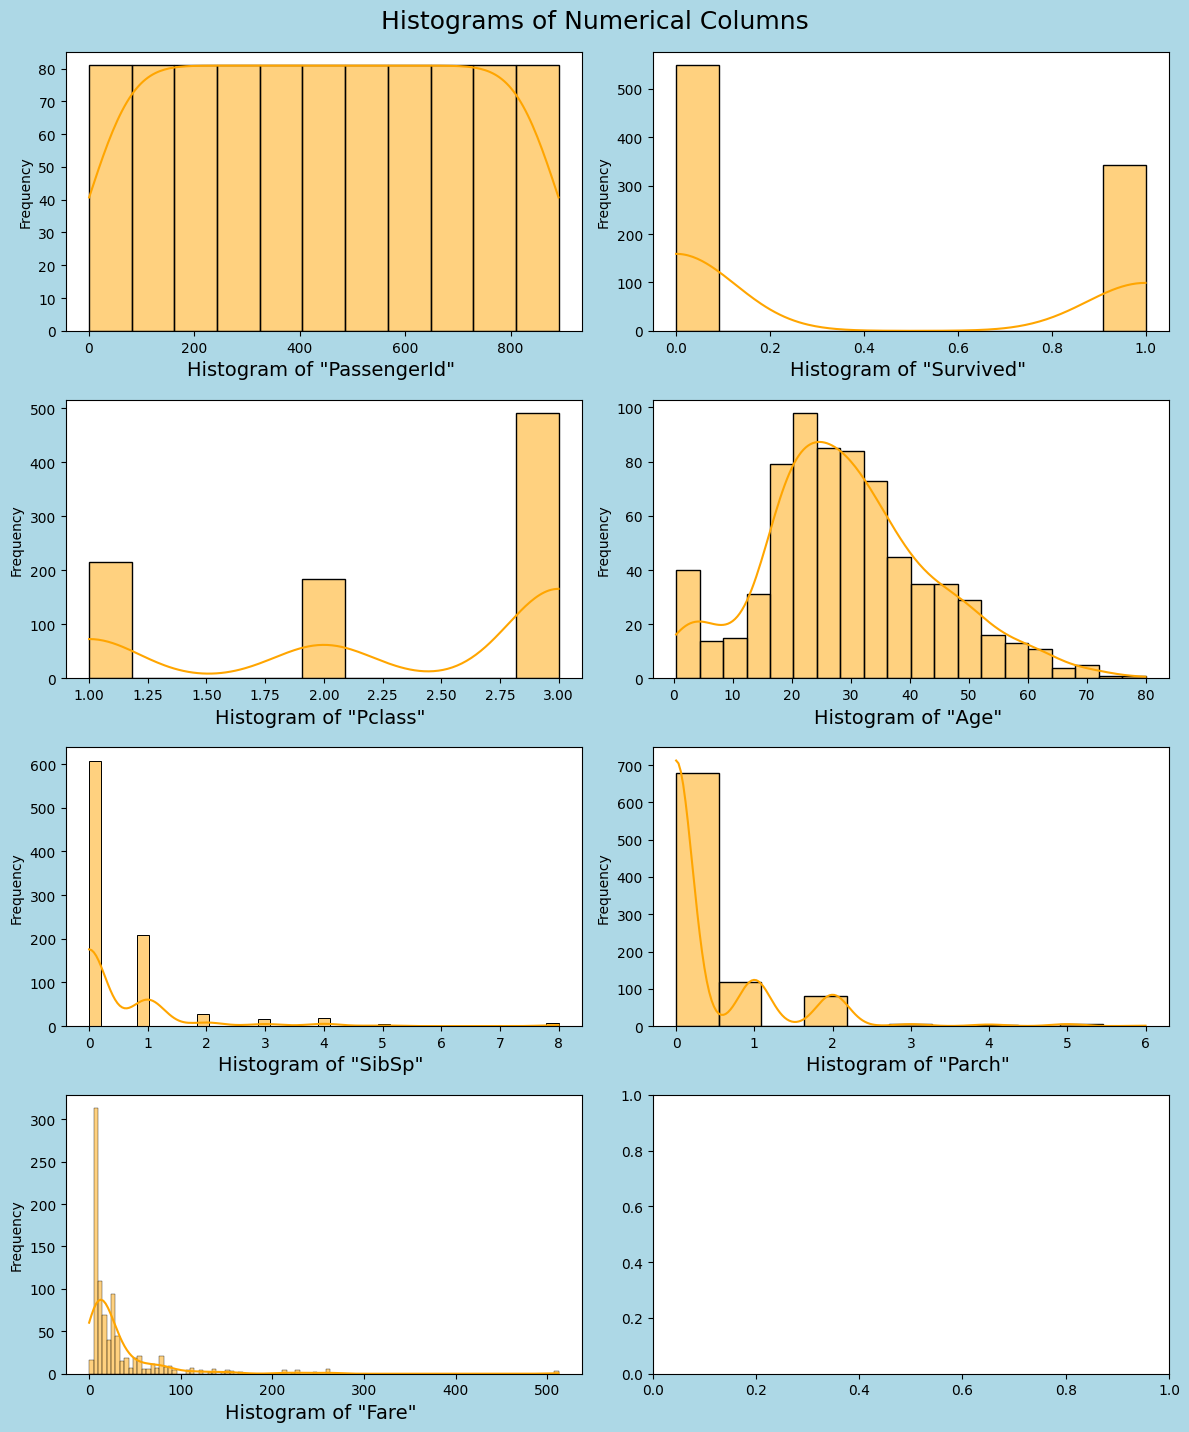

In [6]:
#Visualization of histogram of numerical columns
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

fig,axes = plt.subplots(nrows=4, ncols=2, figsize=(12,14),facecolor = 'lightblue')
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=train_df, x=col, kde=True,bins="auto", ax=axes[i],color= 'orange')
    axes[i].set_xlabel(f'Histogram of "{col}" ',fontsize=14)
    axes[i].set_ylabel('Frequency')


plt.tight_layout()
plt.suptitle('Histograms of Numerical Columns', y=1.02,fontsize ='18')
plt.show()

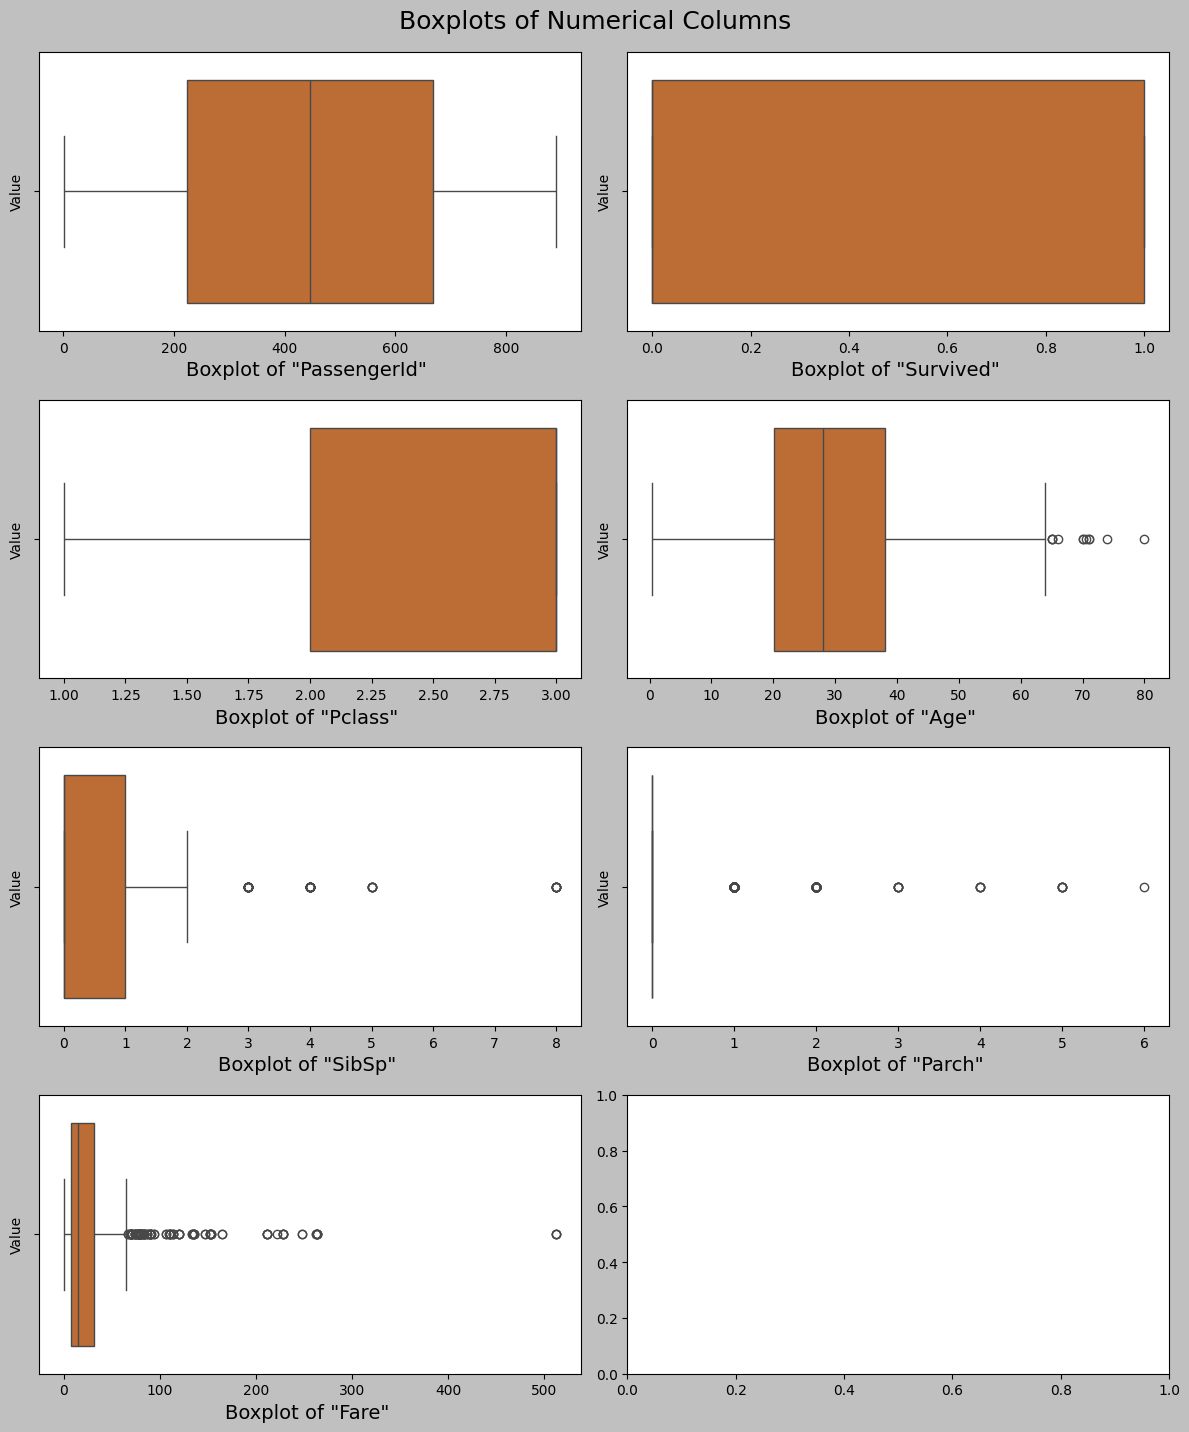

In [7]:
#Boxplotting of numerical columns to view distribution and detect outliers
fig,axes = plt.subplots(nrows=4, ncols=2, figsize=(12,14),facecolor = 'silver')
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=train_df, x=col, ax=axes[i],color= 'chocolate')
    axes[i].set_xlabel(f'Boxplot of "{col}" ',fontsize = 14)
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Columns', y=1.02,fontsize ='18')
plt.show()

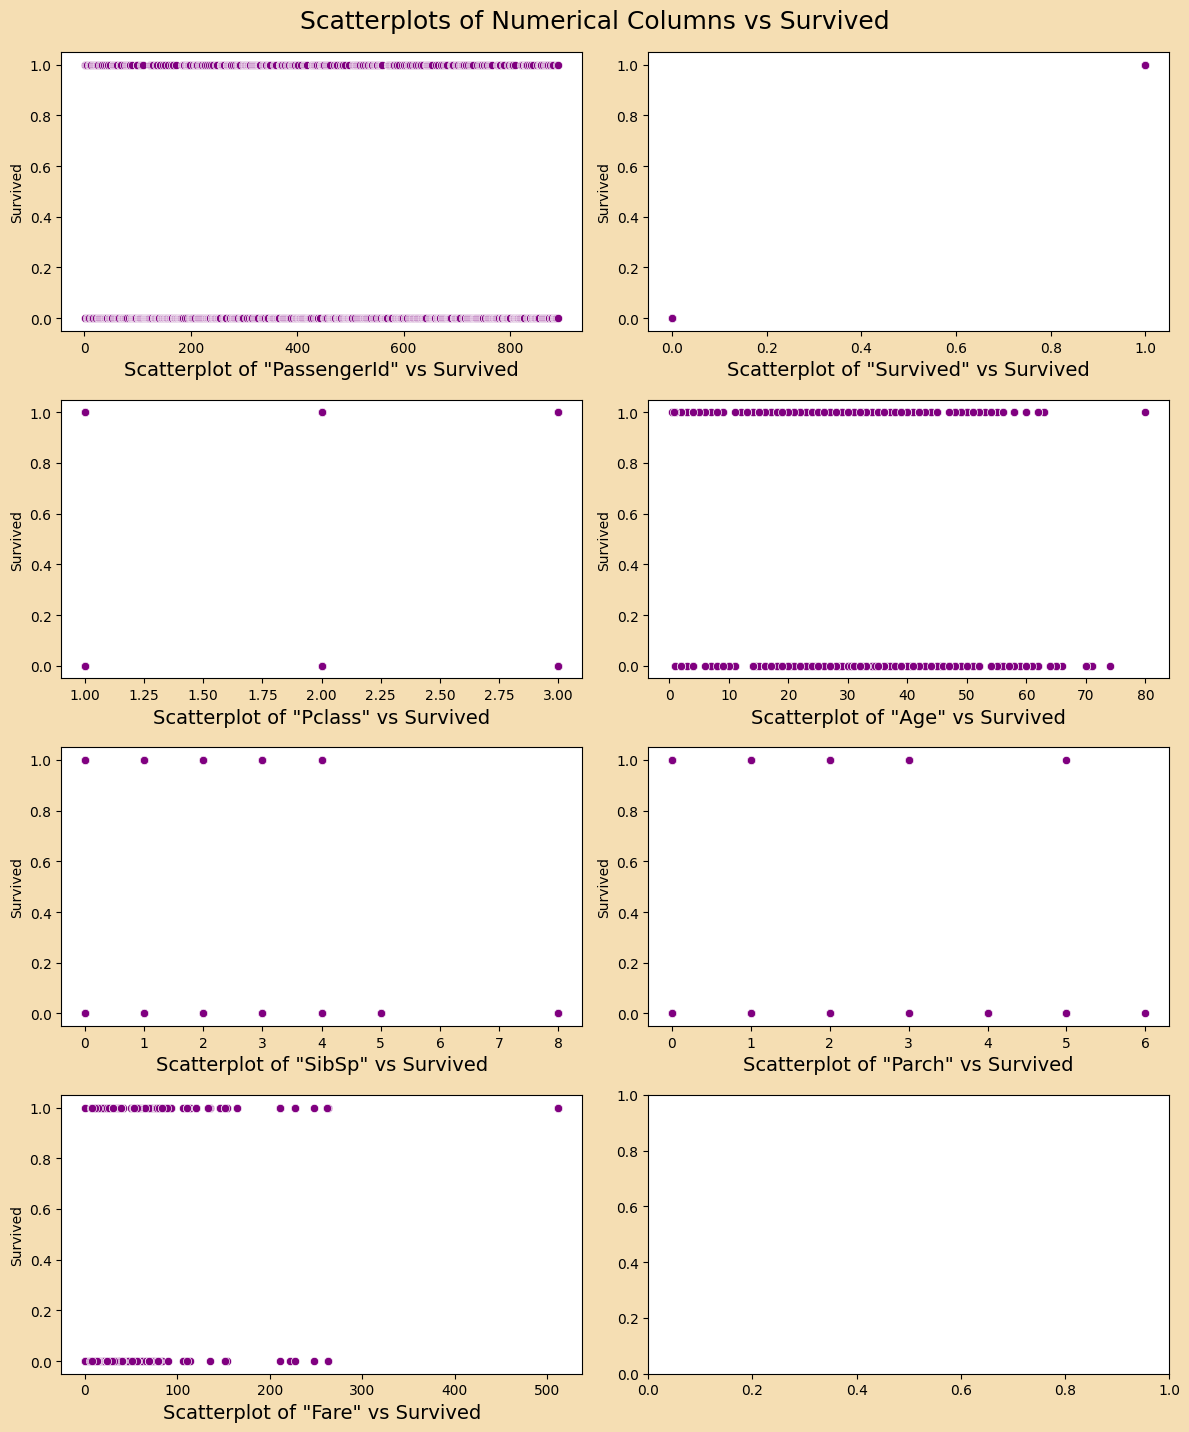

In [8]:
#Visualization of numerical features vs survival using scatterplot
fig,axes = plt.subplots(nrows=4, ncols=2, figsize=(12,14),facecolor = 'wheat')
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.scatterplot(data=train_df, x=col, y='Survived', ax=axes[i],color= 'purple')
    axes[i].set_xlabel(f'Scatterplot of "{col}" vs Survived',fontsize = 14)
    axes[i].set_ylabel('Survived')

plt.tight_layout()
plt.suptitle('Scatterplots of Numerical Columns vs Survived', y=1.02,fontsize ='18')
plt.show()

<ipython-input-9-1abd8d08c2db>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-9-1abd8d08c2db>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-9-1abd8d08c2db>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-9-1abd8d08c2db>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-9-1abd8d08c2db>:10: U

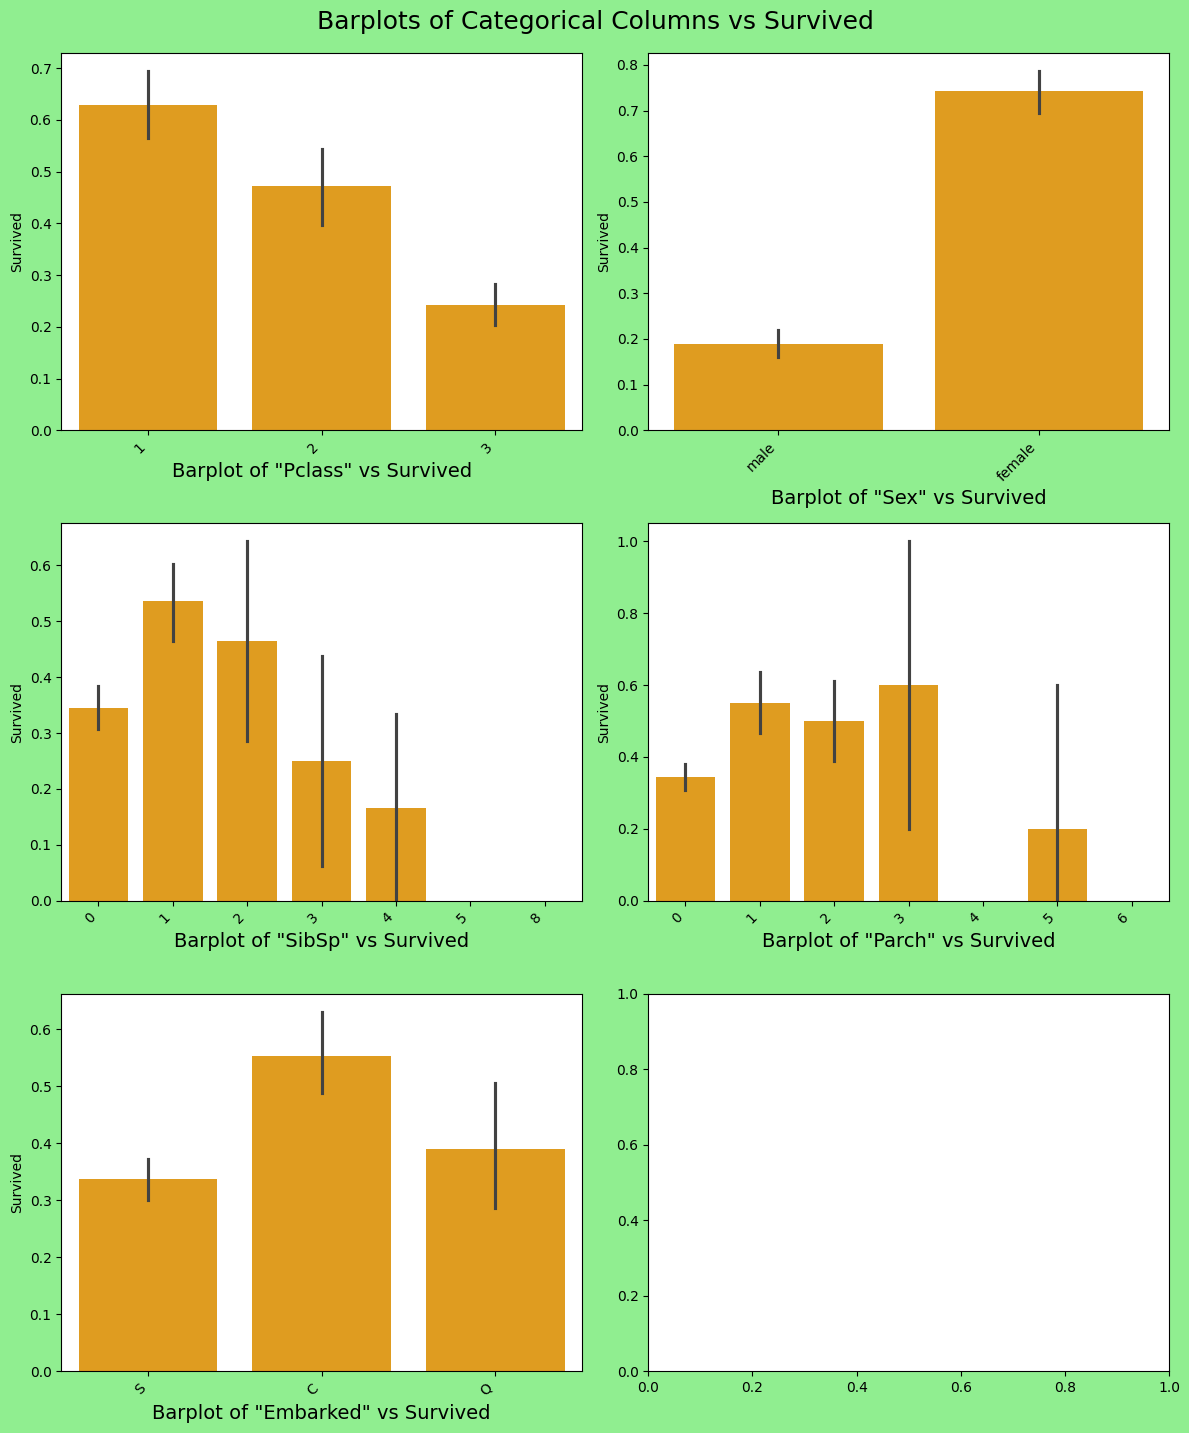

In [9]:
#Visualization of categorical feature vs survival using barplot
selected_cols =['Pclass','Sex','SibSp','Parch','Embarked']
fig,axes = plt.subplots(nrows=3, ncols=2, figsize=(12,14),facecolor = 'lightgreen')
axes = axes.flatten()

for i, col in enumerate(selected_cols):
    sns.barplot(data=train_df, x=col, y='Survived', ax=axes[i],color= 'orange')
    axes[i].set_xlabel(f'Barplot of "{col}" vs Survived',fontsize = 14)
    axes[i].set_ylabel('Survived')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.suptitle('Barplots of Categorical Columns vs Survived', y=1.02,fontsize ='18')
plt.show()

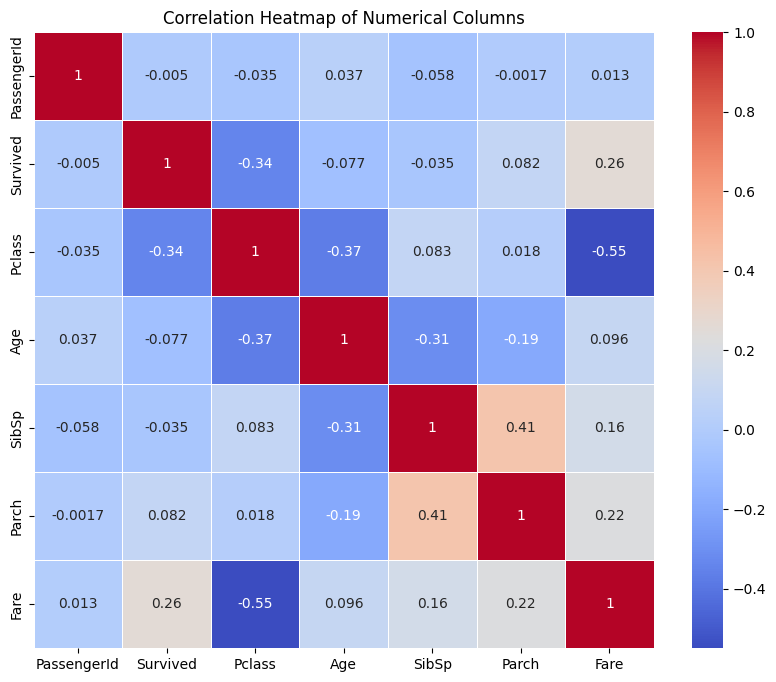

In [10]:
#Correlation heat map of numerical values
corr_matrix = train_df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

### **Insihgts and Patterns**

#### **From Histograms and Boxplots**
**=> <u>PassengerId</u>**   
- No meaningful insight from this since it unique identifying numbers of passengers
- The distribution is typical with no skewness or any tails

**=> <u>Survived (Target Variable)</u>**
- Most of the passengers did not survived the disaster.indicated by the distribution having more 0's that 1.
- Skewed toward 0 since it has more 0's than 1

**=> <u>Pclass (Passenger Class)</u>**
- 3rd class is the most dominant one among the passengers class almost 70% of the passengers are from lower class follwed by 1st and 2nd.
- Right skewed and the has low kurtosis since there are only three classes so no tails.

**=> <u>Survival</u>**
- There is some imbalance, with more passengers who did not survive (0) compared to those who survived (1).
- Since it is binary distribution it more likely skewed toward high no of values of two,right skewed with no kurtosis.

**=> <u>Age</u>**
- Most passengers were between 20-40 years old with few were older passengers (above 60) and a significant number of younger passengers (children).
- Slightly right skewed and moderate kurtosis and boxplot shows outliers in age, indicating a few passengers were significantly older than the norm.

**=> <u>Family Size (SibSp & Parch)</u>**
-  Most passengers had zero or one sibling/spouse (SibSp) on board.
Similarly, most had zero parents/children (Parch), meaning many were traveling alone.and outliers in SibSp and Parch suggests some passengers had large families.
- Both are highly right skewed with some peaks probably most passengers travelled alone.

**=> <u>Fare</u>**
- There are a few passengers paid significantly high amounts probably fist classers who needs more accommodation or lavish life on board and also .
- similar to family size of passengers the distribution is highly right skewed but has long tails and peaks.


> **<u>Survival Patterns:</u>**
 - High chances of survival rate if you are among 1st class passengers - Suggesting better access to lifeboats may be there are some previllages because of thier class.
 - Children had a better survival chance among the passenger then women probably ethical and moral policy such as " children and women first" played a significant role in their survival rate.
 - Large families had lower survival rates among the passengers possibly because it was harder to keep everyone together in the chaos of a disaster.

#### **From Scatterplots,Barplots & Correlation Heatmap**

**=> <u>Survival Rate</u>**
- There are more passengers who did not survive than those who did.
- Survival is highly influenced by class, gender, and fare.

**=> <u>Passenger Class (Pclass) vs. Survival</u>**(-0.34)
- First-class passengers had the highest survival rate among the passengers than second and third-class passengers had the lowest survival rate.

**=> <u>Gender (Sex) vs. Survival</u>**

- Females had a significantly higher survival rate compared to males. children and women policy clearly played a significant role.

**=> <u>Age & Survival</u>**(-0.077)

- Younger passengers had a higher survival rate than older passengers since they lived a long life and young ones need to be protected which is morally right.
 > Age and Pclass correlates(-0.37) suggesting increase in age decreases class means the older passenger is more likely to higher class.
**=> <u>SibSp (Number of Siblings/Spouses Aboard) vs. Survival</u>**(-0.035)

- Passengers who are traveling alone or with one companion had a higher chance of survival than those with more than 3 family members

**=> <u>Parch (Number of Parents/Children Aboard) vs. Survival</u>**(0.082)

- Similar to SibSp, passengers with fewer dependents like children had better survival chances.
 > - A moderate correlation (0.41) between sibsp and parch refers family than came together.
  - A negative correlation between age and sibsp,parch (-0.31 and -0.19 respectively) indicating the more younger the passenger is more likely travelling with parent or sib for security reasons.

**=> <u>Fare vs. Survival</u>**(0.26)

- Higher fares are associated with higher survival rate which aligns with the trend of that first-class passengers had better survival chances.

**=> <u>Embarked vs. Survival</u>**

- Passengers who embarked from "C" (Cherbourg) had the highest survival rate.
Those who embarked from "S" (Southampton) had a lower survival rate.
- This might be a mare coincidence or the seating of passengers might take a part in their survival rate increase.

## **Data Preprocessing**

### **Handling Missing values**

In [11]:
miss_tr = train_df.isnull().sum()
miss_t = test_df.isnull().sum()

miss_table = pd.DataFrame({'Train_set':miss_tr,'Test_set':miss_t})
miss_table

,Train_set,Test_set
Age,177,86.0
Cabin,687,327.0
Embarked,2,0.0
Fare,0,1.0
Name,0,0.0
Parch,0,0.0
PassengerId,0,0.0
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0


> There are some significant missing values in variables like Age, Cabin and Embarked.Let's handle them with appropriate methods.
 - Age - since there are only 177 missing values which are below 20% we imputate with means of the varible which is ~ 29.as well as in test set.
 - Cabin - cabin has the most missing values in the data set so droping the column in both sets is the best choice.
 - Embarked - there are only 2 missing values so replacing them with mode of the column is reasonable since it is categorical column.


In [12]:
#Hndling missing values with proper techniques.
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True) #Dropping the columns so it won't disrupt the in model implimentation
train_df.fillna({'Age': train_df['Age'].mean()}, inplace=True)
test_df.fillna({'Age': test_df['Age'].mean()}, inplace=True)
train_df.fillna({'Embarked':train_df['Embarked'].mode()[0]}, inplace=True)
test_df.fillna({'Age': test_df['Age'].mean()}, inplace=True)


In [13]:
#Dropping unnecessary columns
train_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
test_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [14]:
#Encoding increases dimensionality so to reduce gender map the 'sex' column since both are tree based gradient boosting models
gender_mapping = {'male':1,'emale':0}
train_df['Sex'] = train_df['Sex'].map(gender_mapping)
test_df['Sex'] = test_df['Sex'].map(gender_mapping)
train_df.astype(int,errors = 'ignore')
test_df.astype(int,errors = 'ignore')
train_df['Sex'] = train_df['Sex'].fillna(1).astype('int64')
test_df['Sex'] = test_df['Sex'].fillna(1).astype('int64')

In [15]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


### **Encoding Categorical columns**

In [17]:
#Encodeing categorical column which is embarked
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix=['Embarked'])
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix=['Embarked'])

In [18]:
train_df.astype(int,errors = 'ignore')
test_df.astype(int,errors = 'ignore')
train_df['Embarked_C'] = train_df['Embarked_C'].astype('int64')
train_df['Embarked_Q'] = train_df['Embarked_Q'].astype('int64')
train_df['Embarked_S'] = train_df['Embarked_S'].astype('int64')
test_df['Embarked_C'] = test_df['Embarked_C'].astype('int64')
test_df['Embarked_Q'] = test_df['Embarked_Q'].astype('int64')
test_df['Embarked_S'] = test_df['Embarked_S'].astype('int64')

In [19]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


### **Scaling**

In [20]:
#Scaling the numerical cols with appropriate scaling methods
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
scaler = StandardScaler()
mm_scale = MinMaxScaler()
rob_scale = RobustScaler()

train_df[['Sex','SibSp','Parch','Embarked_C','Embarked_Q','Embarked_S']] = scaler.fit_transform(train_df[['Sex','SibSp','Parch','Embarked_C','Embarked_Q','Embarked_S']])
test_df[['Sex','SibSp','Parch','Embarked_C','Embarked_Q','Embarked_S']] = scaler.fit_transform(test_df[['Sex','SibSp','Parch','Embarked_C','Embarked_Q','Embarked_S']])
train_df[['Pclass']] = mm_scale.fit_transform(train_df[['Pclass']])
test_df[['Pclass']] = mm_scale.fit_transform(test_df[['Pclass']])
train_df[['Age','Fare']] = rob_scale.fit_transform(train_df[['Age','Fare']])
test_df[['Age','Fare']] = rob_scale.fit_transform(test_df[['Age','Fare']])


## **LGBM & XGBM Models**

### **LGBM Model**

In [21]:
#LGBM Model implementation
from sklearn.model_selection import train_test_split
import lightgbm as lgb


#Ensuring that train set and test set have the same features
X_train = train_df.drop(columns=["Survived"])  #Model training features
y_train = train_df["Survived"]  #Target variable


#Aligning test set with train set
missing_cols = set(X_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0  #Add missing columns with default value 0

X_test = test_df[X_train.columns]

params = {
    "objective": "binary",
    "is_unbalance": True,
    "metric": "auc",
    "learning_rate": 0.05,
    "num_leaves": 31,
}
#Initializing LightGBM classifier
lgbm = lgb.LGBMClassifier(**params)

#Training the model train set
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(is_unbalance=True, learning_rate=0.05, metric='auc',
               objective='binary')

### **XGBM Model**

In [22]:
#Importing xgboost model
import xgboost as xgb

params_1 = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 1,
    'alpha': 0,
    'n_estimators': 100,
    'seed': 42
}

#Inintializing XGBM model
xgb_model = xgb.XGBClassifier(**params_1)

#training the model on train set
xgb_model.fit(X_train, y_train)

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=1,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100, ...)

### **Evaluation of Both Models**

In [23]:
#Importing the necessary metrics to evaluate
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

#Evaluating LGBM model on the training dataset
y_train_pred = lgbm.predict(X_train)

#Probability estimations for positive class in train set
y_train_probs = lgbm.predict_proba(X_train)[:, 1]

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training ROC-AUC Score:", roc_auc_score(y_train, y_train_probs))
print("Classification Report on Train Data:\n", classification_report(y_train, y_train_pred))

#Predicting on the test set
test_predictions = lgbm.predict(X_test)
test_probs = lgbm.predict_proba(X_test)[:, 1]  #Probability estimation for positive class in test set

Training Accuracy: 0.8327721661054994
Training ROC-AUC Score: 0.9247648568902523
Classification Report on Train Data:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       549
           1       0.74      0.86      0.80       342

    accuracy                           0.83       891
   macro avg       0.82      0.84      0.83       891
weighted avg       0.84      0.83      0.83       891



In [24]:
#Evaluating XGBM model on training set
y_train_pred_xgb = xgb_model.predict(X_train)

#Probable estimations for positive class in train set
y_train_probs_xgb = xgb_model.predict_proba(X_train)[:, 1]

print("Training Accuracy:", accuracy_score(y_train, y_train_pred_xgb))
print("Training ROC-AUC Score:", roc_auc_score(y_train, y_train_probs_xgb))
print("Classification Report on Train Data:\n", classification_report(y_train, y_train_pred_xgb))

#Predicting on test set using XGBM model
test_predictions_xgb = xgb_model.predict(X_test)
test_probs_xgb = xgb_model.predict_proba(X_test)[:, 1] #Probable estimation for +ve class in test set

Training Accuracy: 0.7811447811447811
Training ROC-AUC Score: 0.8640723697525539
Classification Report on Train Data:
               precision    recall  f1-score   support

           0       0.79      0.89      0.83       549
           1       0.77      0.61      0.68       342

    accuracy                           0.78       891
   macro avg       0.78      0.75      0.76       891
weighted avg       0.78      0.78      0.78       891



### **Optimizing Models Using CV & Hyperparameter Tuning**

In [25]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

#Defining hyperparameter grid
lgbm_param_grid = {
    'num_leaves': [50, 100, 200],  #For more complex models
    'max_depth': [10, 20, 50],  #Increasing range foe complexity
    'learning_rate': [0.05, 0.1],  #Lowering learning rate
    'n_estimators': [1500, 2000],  #More trees for more stability
    'reg_alpha': [0, 0.1],  #L1 regularization
    'reg_lambda': [0, 0.1] #L2 regularization
}

#Using Stratify K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=7, shuffle = True , random_state=42)

#Hyperparameter tuning using RandomizedSearchCV
lgbm_search = RandomizedSearchCV(lgbm, lgbm_param_grid, scoring='accuracy', cv=cv, n_iter=20, n_jobs=-1, verbose=2, random_state=42)

#Fitting the model
lgbm_search.fit(X_train, y_train)

#Get the best model using best estimator
best_lgbm = lgbm_search.best_estimator_


Fitting 7 folds for each of 20 candidates, totalling 140 fits
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [26]:
#Evaluationg the best LGBM model
y_train_pred_best_lgbm = best_lgbm.predict(X_train)
y_train_probs_best_lgbm = best_lgbm.predict_proba(X_train)[:, 1]

print("Training Accuracy:", accuracy_score(y_train, y_train_pred_best_lgbm))
print("Training ROC-AUC Score:", roc_auc_score(y_train, y_train_probs_best_lgbm))
print("Classification Report on Train Data:\n", classification_report(y_train, y_train_pred_best_lgbm))

#Predicting on the test set
test_preds_best_lgbm = best_lgbm.predict(X_test)
test_probs_best_lgbm = best_lgbm.predict_proba(X_test)[:, 1]

Training Accuracy: 0.9506172839506173
Training ROC-AUC Score: 0.9944423140425442
Classification Report on Train Data:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       549
           1       0.90      0.98      0.94       342

    accuracy                           0.95       891
   macro avg       0.94      0.96      0.95       891
weighted avg       0.95      0.95      0.95       891



In [27]:
#Defining hyperparameters for XGBM model

xgb_param_grid = {
    'max_depth': [10,20],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [500,1000],
    'min_child_weight': [1, 2],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0, 0.1],
    'reg_alpha': [ 0,0.1],
    'reg_lambda': [0,0.1]
}

#Using Strtified K-fold cross validation
xgb_cv = StratifiedKFold(n_splits=7, shuffle = True , random_state=42)

#Hyperparameter tuning using RandomizedSearchCV
xgbm_search = RandomizedSearchCV(xgb_model, xgb_param_grid, scoring='accuracy', cv=xgb_cv, n_iter=20, n_jobs=-1, verbose=2, random_state=42)

#Fitting the best model
xgbm_search.fit(X_train, y_train)

#Getting the best model using best estimator
best_xgbm = xgbm_search.best_estimator_

Fitting 7 folds for each of 20 candidates, totalling 140 fits


In [28]:
#Evaluating the best XGBM model
y_train_pred_best_xgbm = best_xgbm.predict(X_train)

y_train_probs_best_xgbm = best_xgbm.predict_proba(X_train)[:, 1]

print("Training Accuracy:", accuracy_score(y_train, y_train_pred_best_xgbm))
print("Training ROC-AUC Score:", roc_auc_score(y_train, y_train_probs_best_xgbm))
print("Classification Report on Train Data:\n", classification_report(y_train, y_train_pred_best_xgbm))

#Predicting on the test set
test_preds_best_xgbm = best_xgbm.predict(X_test)
test_probs_best_lgbm = best_xgbm.predict_proba(X_test)[:, 1]

Training Accuracy: 0.920314253647587
Training ROC-AUC Score: 0.9801153612629022
Classification Report on Train Data:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       549
           1       0.94      0.85      0.89       342

    accuracy                           0.92       891
   macro avg       0.92      0.91      0.91       891
weighted avg       0.92      0.92      0.92       891



### **Comparative Analysis**

**<u>Comparison Analysis Before Optimization</u>**

> **=> Training Accuracy(LightGBM: 83.27% vs XGBoost: 78.11%)**
- LightGBM outperforms XGBoost in accuracy, suggesting it fits the training data better. However, accuracy alone isn't enough to determine the best model.

> **=> ROC-AUC Score (LightGBM: 0.9247 vs XGBoost: 0.8640)**
- LightGBM achieves a significantly higher ROC-AUC score, meaning it is better at differentiating between the two classes"Survived or not".

> **=> Classification Report**

 **For Class 0 (Non-Survivors)**

 |Model	|Precision	|Recall	|F1-Score|
 |-------||||
 |LightGBM|0.90|0.82	|0.86|
 |XGBoost |0.79|0.89	|0.83|

 - LightGBM has better precision, meaning fewer false positives.
 XGBoost has better recall, meaning it correctly identifies more actual non-survivors.

**For Class 1 (Survivors)**


 |Model	|Precision|Recall|F1-Score|
 |------||||
 |LightGBM	|0.74	|0.86	|0.80|
 |XGBoost	|0.77	|0.61	|0.68|

 - LightGBM has better recall (0.86 vs. 0.61), meaning it captures more  actual survivors.
 - XGBoost has slightly better precision (0.77 vs. 0.74), meaning fewer false positives.


**<u>Comparison Analysis After Optimization </u>**

> **=> Training Accuracy(LightGBM: 95.06% vs XGBoost: 92.03%)**
 - Both models improved significantly LightGBM from 83.27% and XGBoost from 78.11%
 - LightGBM still outperforms XGBoost, but the gap is smaller than before.

> **=> ROC-AUC Score(LightGBM: 0.9944 vs XGBoost: 0.9801)**
- Both models saw a major boost in ROC-AUC,LightGBM from 0.9247 and XGBoost
 from 0.8640 indicating much better class separation.
- LightGBM's score (0.99) is very high, which raises a concern of overfitting.

> **=> Classification Report Analysis**

 **For Class 0 (Non-Survivors)**

 |Model	|Precision	|Recall	|F1-Score|
 |-------||||
 |LightGBM| 0.98|	0.93| 0.96|
 |XGBoost | 0.91| 0.96| 0.94|

 1. LightGBM has better precision (0.98 vs. 0.91) -suggesting fewer false positives.
 2. XGBoost has better recall (0.96 vs. 0.93) → meaning catches more actual non-survivors.


 **For Class 1 (Survivors)**

 |Model	|Precision	|Recall	|F1-Score|
 |-------||||
 |LightGBM	|0.90	|0.98	|0.94|
 |XGBoost	|0.94	|0.85	|0.89|

 1. LightGBM has much better recall (0.98 vs. 0.85) → It correctly identifies 2.more survivors.
 2. XGBoost has slightly better precision (0.94 vs. 0.90) → It makes fewer false positive survivor predictions.

### **Visualization**

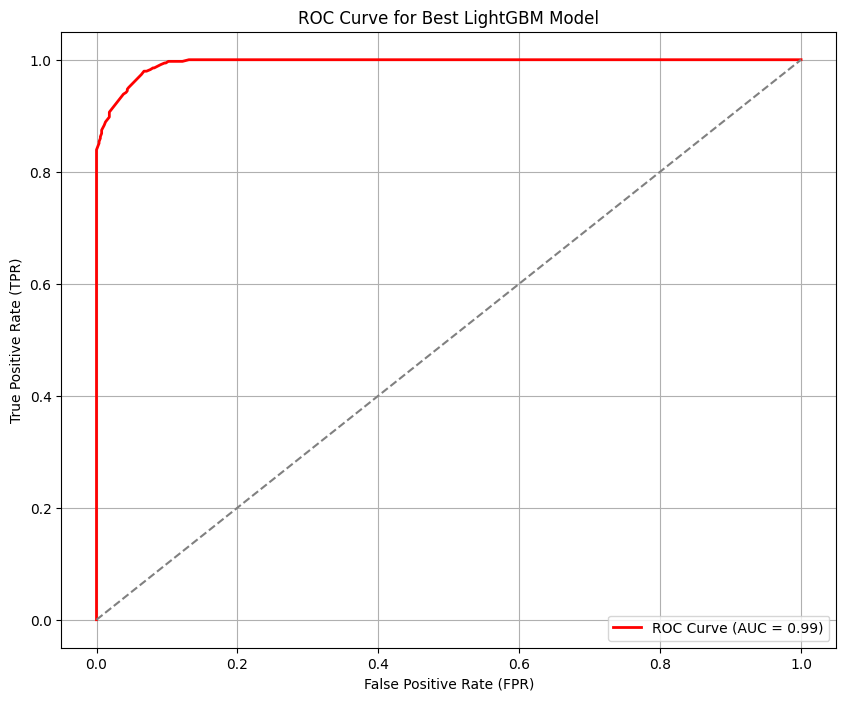

In [29]:
#Visualizing the roc_curve of Best LightGBM model
from sklearn.metrics import roc_curve,roc_auc_score

#Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_probs_best_lgbm)

#Calculating AUC score
auc_score = roc_auc_score(y_train, y_train_probs_best_lgbm)

#Plotting the ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color="red", lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Best LightGBM Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()


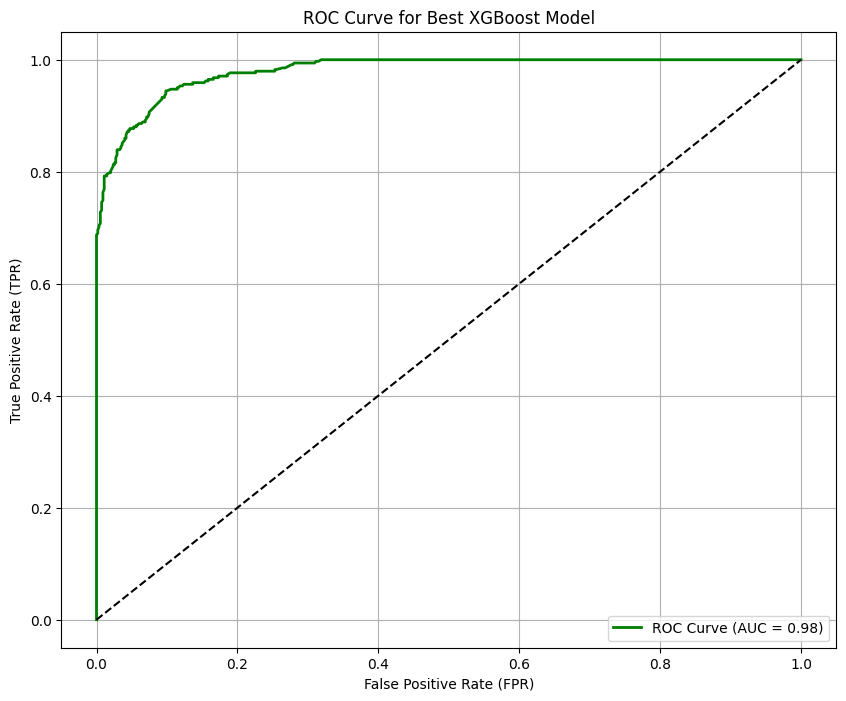

In [30]:
#Visualizing ROC_curve of Best XGBoost Model

fpr, tpr, thresholds = roc_curve(y_train,y_train_probs_best_xgbm) #Calculating roc curve

#Calculating auc score
auc_score = roc_auc_score(y_train, y_train_probs_best_xgbm)

#Plotting the ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color="green", lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Best XGBoost Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()


### **Interpretation**

**<u>Best LightGBM Model</u>**

- The ROC curve for LightGBM model is very close to the top-left corner, indicating an excellent model.
- The AUC score of 0.99 suggests that the model has near-perfect discrimination between the two classes.
- However, this could indicate potential overfitting, as such a high score might not generalize well to unseen data.

**<u>Best XGBoost Model</u>**

- The ROC curve for XGBoost model is also close to the top-left, but slightly below LightGBM's curve.
- The AUC score of 0.98 is still excellent, but marginally lower than LightGBM's.
- This suggests that XGBoost also performs very well but might be slightly more robust and generalizable compared to LightGBM.

> **<u>Main Observations</u>**

- Both models perform exceptionally well, with high AUC values.
- LightGBM shows a slightly better AUC but might be overfitting (as seen in its training accuracy of 95%).
- XGBoost slightly behind, could be more generalizable to unseen data.
- If the models show a significant drop in performance on the test set, further regularization might be needed, especially for LightGBM.

## **Brief Report About This Assignment**

### **Introduction**

> This brief report presents a comparative analysis of LightGBM and XGBoost models applied to the Titanic dataset. The study involves EDA,data preprocessing, hyperparameter tuning using cross-validation, model evaluation, and visualization of the ROC curves to assess the performance.

### **Methodology**

=> Dataset: Titanic dataset(train and test)

=> Models: LightGBM and XGBoost

=> Evaluation Metrics: Accuracy, ROC-AUC Score, Precision, Recall, F1-score

=> Hyperparameter Tuning: RandomizedSearchCV with Stratified K-Fold Cross-Validation

=> Visualizations: ROC Curves for both models

### **Results**

**<u>Performance Before Optimization</u>**

=> LightGBM:
- Training Accuracy: 83.28%
- ROC-AUC Score: 92.48%
- Precision, Recall, F1-score: Balanced but with potential underfitting

=> XGBoost:

- Training Accuracy: 78.11%
- ROC-AUC Score: 86.41%
- Recall for class 1 was lower, suggesting misclassification


 **<u>Performance After Optimization</u>**

=> LightGBM:

- Training Accuracy: 95.06%
- ROC-AUC Score: 99.44%
- F1-score improved, showing better classification balance
- ROC curve shows near-perfect classification with minimal false positives

=> XGBoost:

- Training Accuracy: 92.03%
- ROC-AUC Score: 98.01%
- Improved recall for minority class (1)
- ROC curve indicates high classification performance

### **Interpretation of ROC Curves**

- Both models exhibit excellent classification performance post-optimization.

- LightGBM (AUC = 0.99) shows a steeper curve, indicating slightly better separability of classes.

- XGBoost (AUC = 0.98) also demonstrates strong classification capability but marginally underperforms compared to LightGBM.

### **Conclusion**

- LightGBM outperforms XGBoost in accuracy and AUC-ROC score, indicating a stronger ability to classify survival on the Titanic dataset.

- Both models benefited significantly from hyperparameter tuning.

- LightGBM is preferable for this dataset due to its higher accuracy and AUC score.